# 1. Standard Scaling 
### Definition:
Standardize features by removing the mean and scaling to unit variance
### Formula:
$z = \frac{x - \mu}{\sigma}$
### Example:
python
from sklearn.preprocessing import StandardScaler

In [22]:
# import libraries 
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler , MaxAbsScaler , RobustScaler

In [16]:
# make an example dataset
data ={
    'Age': [25,30,35,40,45],
    'Height': [165,170,175,180,185],
    'Weight': [55,60,65,70,75]
}

df = pd.DataFrame(data)
df

,Age,Height,Weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [7]:
# import the scaler
scalar = StandardScaler()

# fit the scaler
scaled_df = scalar.fit_transform(df)

scaled_df
# convert this data into a pandas dataframe
scaled_df= pd.DataFrame(scaled_df,columns=df.columns)

scaled_df


,Age,Height,Weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# Min-Max Scalar
### Definition:
Scale features to a given range
### Formula:
$z = \frac{x - \min}{\max - \min}$
### Example:
python
from sklearn.preprocessing import MinMaxScaler


In [19]:
scalar = MinMaxScaler()

# fit the scaler
scaled_df = scalar.fit_transform(df)

scaled_df
# convert this data into a pandas dataframe
scaled_df= pd.DataFrame(scaled_df,columns=df.columns)

scaled_df

,Age,Height,Weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# MaxAbsoulte Scaler
### Definition:
Scale features to a given range
### Formula:
$z = \frac{x}{\max}$
### Example:
python
from sklearn.preprocessing import MaxAbsScaler





In [20]:
scalar = MaxAbsScaler()

# fit the scaler
scaled_df = scalar.fit_transform(df)

scaled_df
# convert this data into a pandas dataframe
scaled_df= pd.DataFrame(scaled_df,columns=df.columns)

scaled_df

,Age,Height,Weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# RobustScaler
### Definition:
Scale features to a given range
### Formula:
$z = \frac{x - \median}{\kappa}$
### Example:
python
from sklearn.preprocessing import RobustScaler

In [23]:
scalar = RobustScaler()

# fit the scaler
scaled_df = scalar.fit_transform(df)

scaled_df
# convert this data into a pandas dataframe
scaled_df= pd.DataFrame(scaled_df,columns=df.columns)

scaled_df

,Age,Height,Weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


---
# Transformation
### Definition:
Transform features by using a power, log, or sigmoid function
### Example:
python
from sklearn.preprocessing import PowerTransformer

In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
# generate non-normal data (exponential Distribution) np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df


,values
0,0.428775
1,0.667137
2,0.861334
3,0.456203
4,1.551008
...,...
995,1.380225
996,0.259675
997,3.709155
998,5.726228


<Axes: xlabel='values', ylabel='Count'>

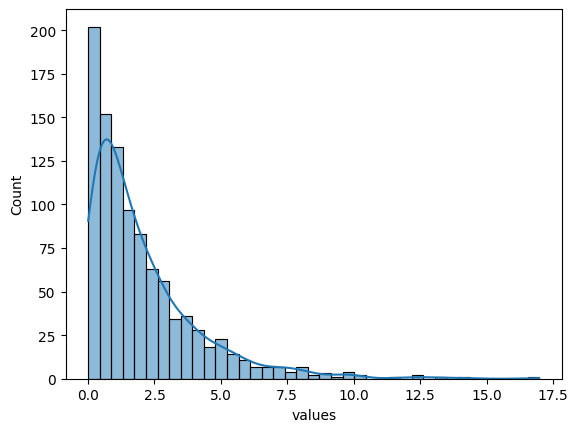

In [74]:
sns.histplot(df['values'],kde=True)

In [75]:
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox',standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson',standardize=False)
qt_quantile = QuantileTransformer(output_distribution='normal')



df_boxcox = pt_boxcox.fit_transform(df)
df_yeo_johnson = pt_yeo_johnson.fit_transform(df)

# box-cox k liya data must be posetive 

df['box-cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['yeo-johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['quantile'] = qt_quantile.fit_transform(df[['values']])


In [76]:
df.head()

,values,box-cox,yeo-johnson,quantile
0,0.428775,0.332890,0.332890,-0.858910
1,0.667137,0.462972,0.462972,-0.552537
2,0.861334,0.551149,0.551149,-0.384375
3,0.456203,0.349352,0.349352,-0.816150
4,1.551008,0.783260,0.783260,0.111890


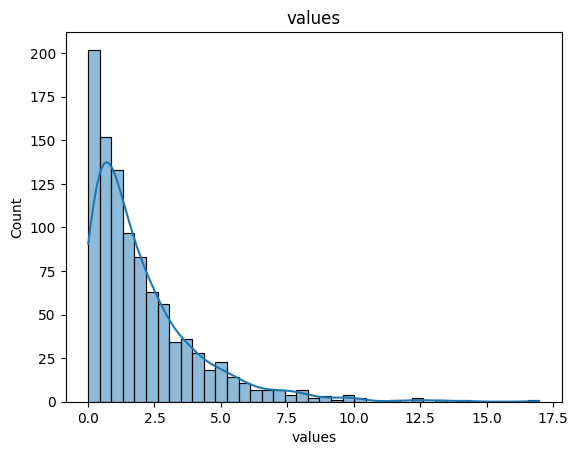

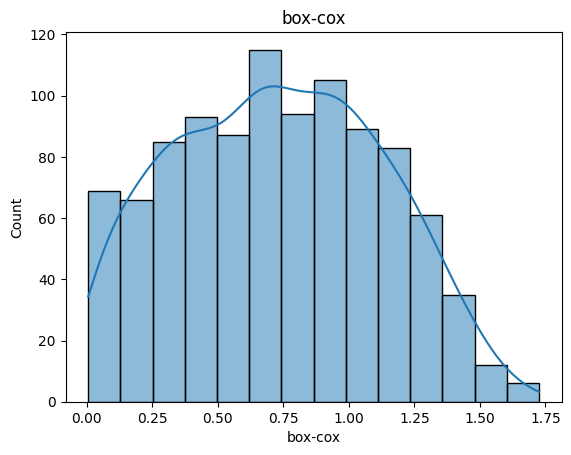

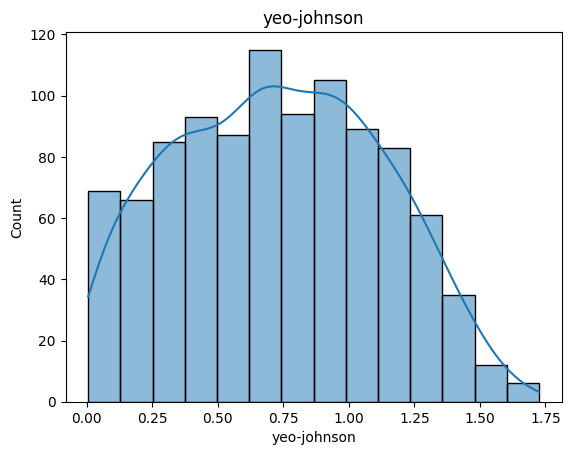

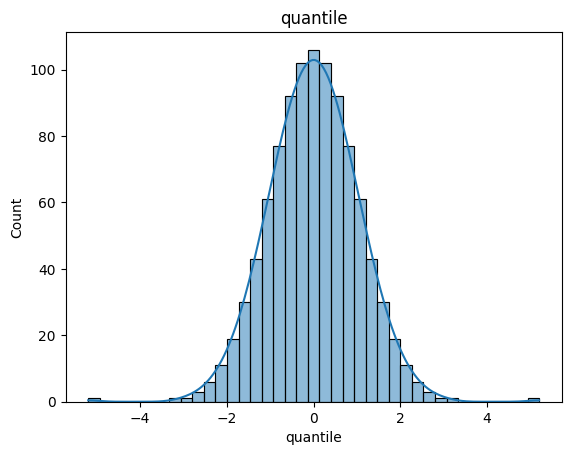

In [77]:
# create histograms for all columns using sns.hist and kde=true use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()

---
# l2 Normaliztion
Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data.
The L2 norm is calculated as the square root of the sum of the squared vector values.

### Formula:

$z = \frac{x}{\sqrt{\sum_{i=1}^n x_i^2}}$

### Example:

python
from sklearn.preprocessing import Normalizer




In [81]:
from sklearn.preprocessing import Normalizer

data = [[1,1,1], [1,1,0], [1,0,0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# L1 Normalization 

Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute values is 1 
in each row 
The L1 norm is calculated as the sum of absolute vector values Example

### Formula:

$z = \frac{\sum_{i=1}^n |x_i|}{\sum_{i=1}^n x_i}$

### Example:

python
from sklearn.preprocessing import Normalizer

In [82]:
from sklearn.preprocessing import Normalizer

data = [[1,1,1], [1,1,0], [1,0,0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


1. Z-score normalization
    1. standard sclar 
2. Min-Max normalization 
   1. Min-Max scalar
 

# Log Transformation 

### Definition:

Transform features by taking the log

### Formula:

$z = \log(x+1)$

### Example:

python
from sklearn.preprocessing import Normalizer

In [85]:
import pandas as pd 
import numpy as np


# example dataset with skewed values


data = {"values":[1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}

df = pd.DataFrame(data)
df



,values
0,1
1,5
2,10
3,20
4,50
5,100
6,200
7,500
8,1000
9,2000


In [89]:
df['log_values'] = np.log(df['values'])
df

,values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


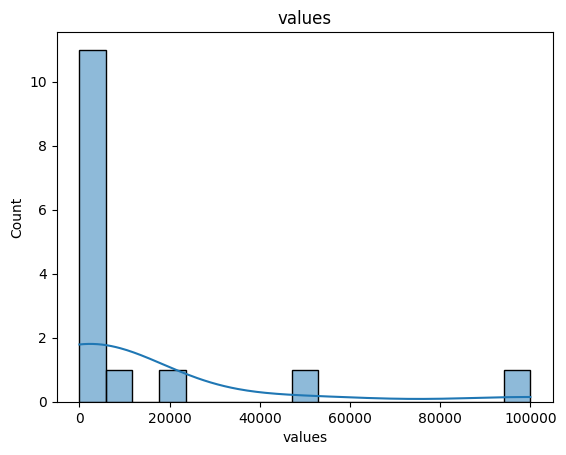

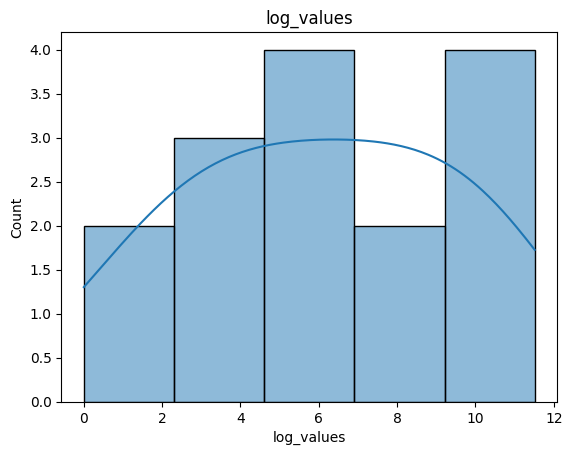

In [90]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()